<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2008%EC%9D%BC/11%EC%9B%94_8%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 판다스 문제풀이

In [ ]:
import pandas as pd
nfl = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/nfl.csv',parse_dates=['Birthday'])
nfl.head()

,Name,Team,Position,Birthday,Salary
0,Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
1,Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
2,Adam Butler,New England Patriots,DT,1994-04-12,645000
3,Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
4,Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000


In [ ]:
# Birthday 열의 값을 날짜/시간으로 변환하는 효과적인 방법은 무엇일까요?
nfl = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/nfl.csv',parse_dates=['Birthday'])

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [ ]:
# 선수의 이름을 DataFrame의 인덱스로 지정하는 두 가지 방법은 무엇인가요?
nfl = nfl.set_index('Name')
nfl = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/nfl.csv',index_col='Name',parse_dates=['Birthday'])
nfl

KeyError: ignored

In [ ]:
# 팀 당 선수가 몇 명인지 계산하는 방법은 무엇인가요?
nfl.groupby('Team').value_counts().head()

Team               Position  Birthday    Salary  
Arizona Cardinals  C         1996-03-28  570000      1
                   CB        1990-07-11  11000000    1
                   G         1990-08-15  5000000     1
                   NT        1997-09-04  495000      1
                             1988-06-08  3250000     1
dtype: int64

In [ ]:
# 가장 높은 연봉을 받는 5명의 선수는 누구인가요?
salary = nfl.sort_values(by='Salary',ascending=False)
salary.head()

,Team,Position,Birthday,Salary
Name,,,,
Kirk Cousins,Minnesota Vikings,QB,1988-08-19,27500000
Jameis Winston,Tampa Bay Buccaneers,QB,1994-01-06,20922000
Marcus Mariota,Tennessee Titans,QB,1993-10-30,20922000
Derek Carr,Oakland Raiders,QB,1991-03-28,19900000
Jimmy Garoppolo,San Francisco 49Ers,QB,1991-11-02,17200000


In [ ]:
# 데이터셋에서 먼저 팀을 알파벳 순서로 정렬한 다음 연봉을 내림차순으로 정렬해보세요.
nfl.sort_values(['Team','Salary'], ascending=[True,False])

,Team,Position,Birthday,Salary
Name,,,,
Chandler Jones,Arizona Cardinals,OLB,1990-02-27,16500000
Patrick Peterson,Arizona Cardinals,CB,1990-07-11,11000000
Larry Fitzgerald,Arizona Cardinals,WR,1983-08-31,11000000
David Johnson,Arizona Cardinals,RB,1991-12-16,5700000
Justin Pugh,Arizona Cardinals,G,1990-08-15,5000000
...,...,...,...,...
Ross Pierschbacher,Washington Redskins,C,1995-05-05,495000
Kelvin Harmon,Washington Redskins,WR,1996-12-15,495000
Wes Martin,Washington Redskins,G,1996-05-09,495000


In [ ]:
# New York Jets 팀에서 가장 나이가 많은 선수는 누구이며 그의 생일 언제인가요?
ny = nfl[nfl.Team == 'New York Jets']
ny.sort_values(by='Birthday').head(1)

,Team,Position,Birthday,Salary
Name,,,,
Ryan Kalil,New York Jets,C,1985-03-29,2400000


# 기계 학습(주식 시세)


In [ ]:
# 웹크롤링 사용
import pandas as pd
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=086520&page='
header = {'user-agent':'Mozilla/5.0'}

data = pd.DataFrame()
for i in range(1,100):
    new_url = url + str(i)
    page = requests.get(new_url, headers=header)
    table = pd.read_html(page.text)[0]
    data = pd.concat([data,table])

data

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.11.08,737000.0,122000.0,821000.0,843000.0,737000.0,1030062.0
2,2023.11.07,859000.0,31000.0,870000.0,928000.0,795000.0,2345414.0
3,2023.11.06,828000.0,191000.0,732000.0,828000.0,712000.0,1153091.0
4,2023.11.03,637000.0,12000.0,666000.0,680000.0,631000.0,659109.0
...,...,...,...,...,...,...,...
10,2019.11.11,20400.0,400.0,20700.0,20900.0,20150.0,119114.0
11,2019.11.08,20800.0,350.0,20750.0,21200.0,20600.0,160161.0
12,2019.11.07,20450.0,700.0,21150.0,21250.0,20300.0,242041.0
13,2019.11.06,21150.0,50.0,21200.0,21400.0,20950.0,205231.0


In [ ]:
# 결측치 제거
data.dropna(inplace=True)

# 열 이름 영문으로 변경
data.rename(columns={'날짜':'ds'}, inplace=True)

# 중위값 열 추가
data['y'] = data['고가'] - ((data['고가'] - data['저가'])/2)

data.head()

,ds,종가,전일비,시가,고가,저가,거래량,y
1,2023.11.08,737000.0,122000.0,821000.0,843000.0,737000.0,1030062.0,790000.0
2,2023.11.07,859000.0,31000.0,870000.0,928000.0,795000.0,2345414.0,861500.0
3,2023.11.06,828000.0,191000.0,732000.0,828000.0,712000.0,1153091.0,770000.0
4,2023.11.03,637000.0,12000.0,666000.0,680000.0,631000.0,659109.0,655500.0
5,2023.11.02,649000.0,52000.0,616000.0,649000.0,607000.0,539406.0,628000.0


In [ ]:
# 학습 대상 데이터프레임 생성
df = pd.DataFrame()

# 필요한 열만 추출하여 저장
df = data[['ds','y']]
df

,ds,y
1,2023.11.08,790000.0
2,2023.11.07,861500.0
3,2023.11.06,770000.0
4,2023.11.03,655500.0
5,2023.11.02,628000.0
...,...,...
9,2019.11.12,20375.0
10,2019.11.11,20525.0
11,2019.11.08,20900.0
12,2019.11.07,20775.0


In [ ]:
# 프로펫 모델 객체 만들기
from prophet import Prophet
m = Prophet()

# 데이터프레임 학습하기  - fit() 함수 사용
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/t3aj4asv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/ks0ea_ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45562', 'data', 'file=/tmp/tmpwvgozws4/t3aj4asv.json', 'init=/tmp/tmpwvgozws4/ks0ea_ex.json', 'output', 'file=/tmp/tmpwvgozws4/prophet_modelxxy4jqjo/prophet_model-20231108115217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측 데이터프레임 준비
future = m.make_future_dataframe(periods = 1000)  # 1000일 의미

# 끝부분 확인하기
future.tail()

,ds
1985,2026-07-31
1986,2026-08-01
1987,2026-08-02
1988,2026-08-03
1989,2026-08-04


In [ ]:
# 예측하기 - predict() 함수 사용
forecast = m.predict(future)

# 예측결과 끝부분 확인하기
forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail()


,yhat,yhat_lower,yhat_upper
1985,4.051314e+06,3.445511e+06,4.672979e+06
1986,4.047767e+06,3.448332e+06,4.655345e+06
1987,4.049408e+06,3.413811e+06,4.681093e+06
1988,4.057384e+06,3.437066e+06,4.686778e+06
1989,4.060087e+06,3.454000e+06,4.668647e+06


In [ ]:
# 위 값이 뭔가 이상하므로 범위 정해서 예측
m2 = Prophet()

# 2021-01-01 이후 데이터로 예측
df2 = df[df.ds > '2021-01-01']

df2.tail()

,ds,y
13,2021.01.08,57850.0
1,2021.01.07,54550.0
2,2021.01.06,52250.0
3,2021.01.05,52450.0
4,2021.01.04,51150.0


In [ ]:
# 데이터 학습, 예측, 예측 결과 끝부분 확인
m2.fit(df2)

future2 = m.make_future_dataframe(periods=1000)
forecast2 = m2.predict(future2)

forecast2[['yhat','yhat_lower','yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/9t94rfpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/dmbm9tp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=260', 'data', 'file=/tmp/tmpwvgozws4/9t94rfpp.json', 'init=/tmp/tmpwvgozws4/dmbm9tp7.json', 'output', 'file=/tmp/tmpwvgozws4/prophet_modelw8c0lklx/prophet_model-20231108120441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,yhat,yhat_lower,yhat_upper
1985,2.935238e+06,-290370.012673,6.094015e+06
1986,2.793382e+06,-448788.773353,5.993348e+06
1987,2.793556e+06,-481801.537190,5.929095e+06
1988,2.936500e+06,-306695.396295,6.081249e+06
1989,2.939160e+06,-378205.672370,6.089057e+06


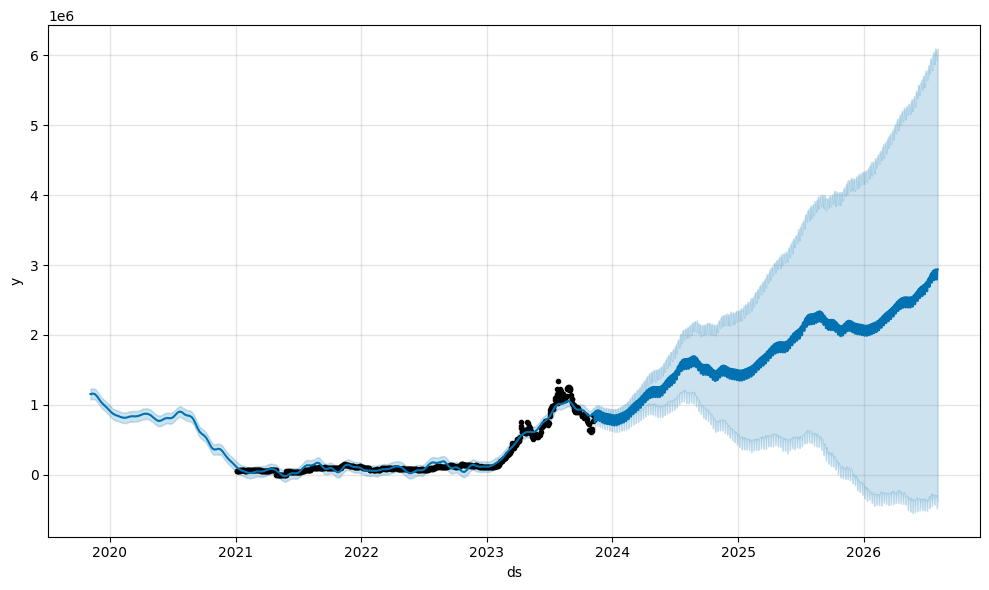

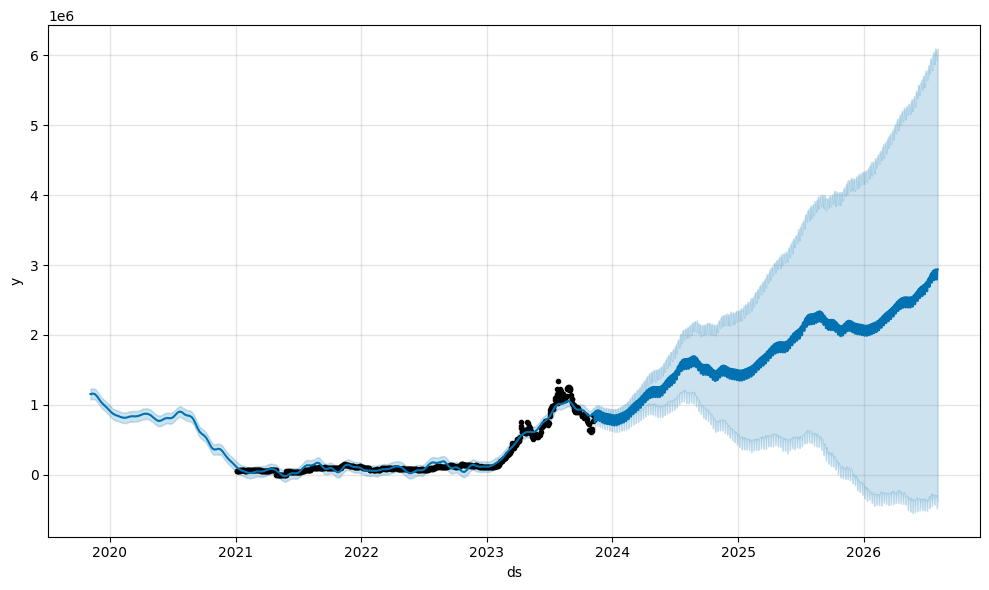

In [ ]:
# 위 데이터 시각화 하기
m2.plot(forecast2)

In [ ]:
# 대화형 예측 그래프 그리기
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m2, forecast2)

# 미니 프로젝트(covid)

In [ ]:
import pandas as pd
from prophet import Prophet

data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
# 한국의 신규 확진자 수 예측해보기

# 필요한 데이터 가져오기
korea = data[data.location == 'South Korea'].copy()
korea.head()

kor = korea[['date','new_cases']].copy()
kor

# 기계학습 위한 컬럼 이름 변경
kor.rename(columns={'date':'ds', 'new_cases':'y'},inplace=True)
kor


,ds,y
160818,2020-01-22,NaN
160819,2020-01-23,0.0
160820,2020-01-24,1.0
160821,2020-01-25,0.0
160822,2020-01-26,1.0
...,...,...
161681,2022-06-03,12016.0
161682,2022-06-04,9835.0
161683,2022-06-05,5022.0
161684,2022-06-06,6172.0


## A value is trying to be set on a copy of a slice from a DataFrame
- 별 중요하지 않은 오류인줄 알았으나 매우 중요!
- 의도치 않은 구현을 경고하는 의미로
- copy() 사용하면 해결됨!!
- 위 에러 발생하지 않게 코딩하는 습관 ㄱㄱ

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/mc4vv6ru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/3b_cmp37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57314', 'data', 'file=/tmp/tmpwvgozws4/mc4vv6ru.json', 'init=/tmp/tmpwvgozws4/3b_cmp37.json', 'output', 'file=/tmp/tmpwvgozws4/prophet_model9yduhd4f/prophet_model-20231108122608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


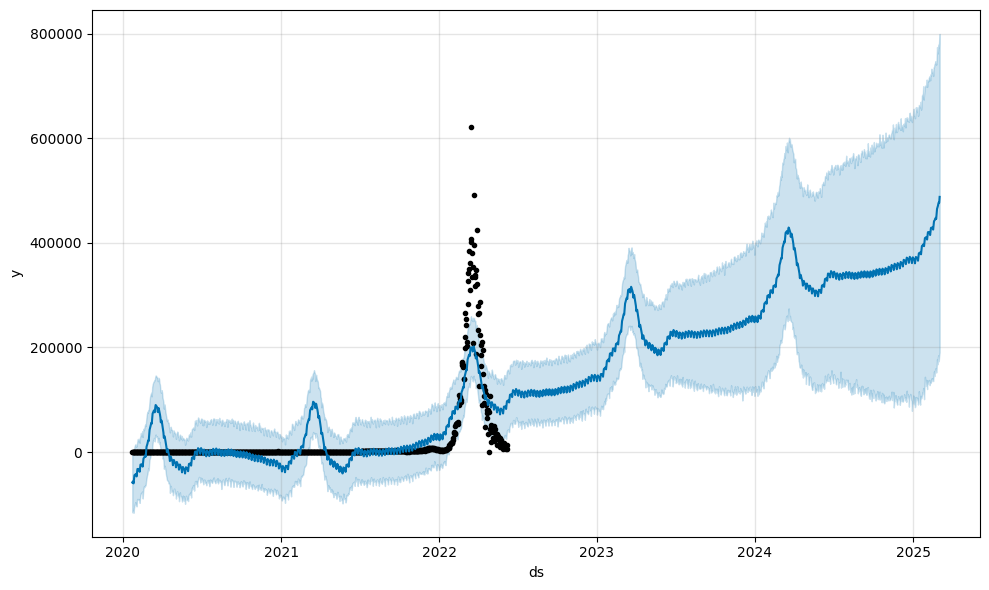

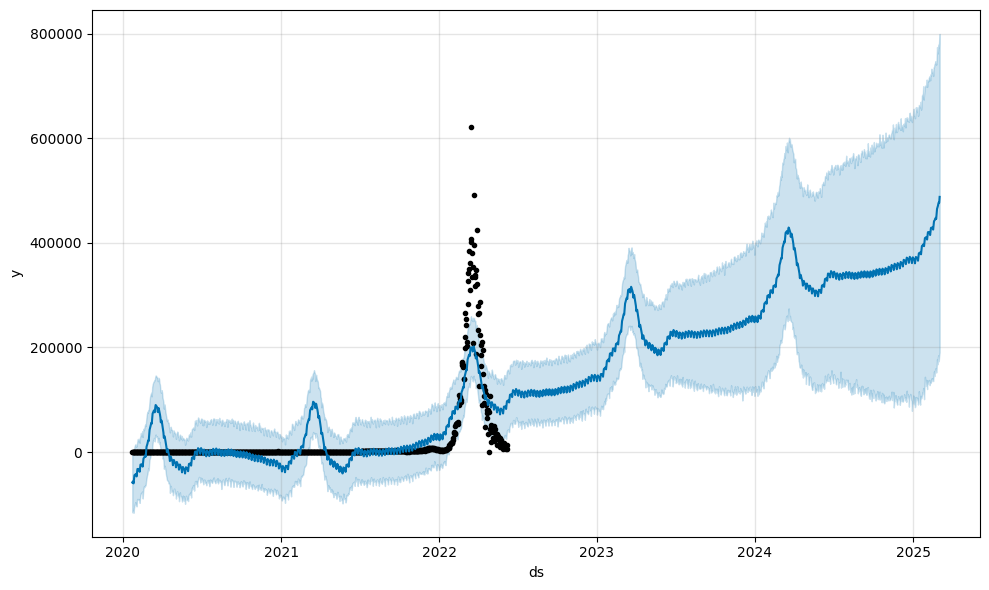

In [ ]:
# 데이터 학습 및 예측
m = Prophet()

m.fit(kor)

fut = m.make_future_dataframe(periods=1000)
fut.tail()

forcast = m.predict(fut)
forcast[['yhat','yhat_lower','yhat_upper']].tail()

# 시각화
m.plot(forcast)

# 미니 프로젝트(강사님 ver.)

In [ ]:
import pandas as  pd

raw_df = pd.read_csv(r'/content/drive/MyDrive/AI스쿨 파일/owid-covid-data.csv')

# 1) 원하는 열 리스트 만들기
selected_columns = ['location', 'date', 'total_cases']

# 2) 원하는 열로 개정된 데이터프레임 생성
revised_df = raw_df[selected_columns]

# 3) 개정된 데이터프레임 데이터 일부 확인하기
revised_df.head()

# 대한민국 데이터프레임 생성하기
kor_df = revised_df[revised_df.location == 'South Korea'].copy()

# 데이터 일부 확인하기
kor_df.head()

# 필요한 열만 추출
final_kor_df = kor_df[ ['date', 'total_cases']].copy()
final_kor_df

# 프로핏 입력 형식을 맞추기 위한 열 이름 변경
final_kor_df.rename(columns={'date':'ds', 'total_cases':'y'}, inplace=True)
final_kor_df

,ds,y
160818,2020-01-22,1.0
160819,2020-01-23,1.0
160820,2020-01-24,2.0
160821,2020-01-25,2.0
160822,2020-01-26,3.0
...,...,...
161681,2022-06-03,18153851.0
161682,2022-06-04,18163686.0
161683,2022-06-05,18168708.0
161684,2022-06-06,18174880.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/uchcr1u2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvgozws4/p63qwte2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30568', 'data', 'file=/tmp/tmpwvgozws4/uchcr1u2.json', 'init=/tmp/tmpwvgozws4/p63qwte2.json', 'output', 'file=/tmp/tmpwvgozws4/prophet_modela6qomyvy/prophet_model-20231108122836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


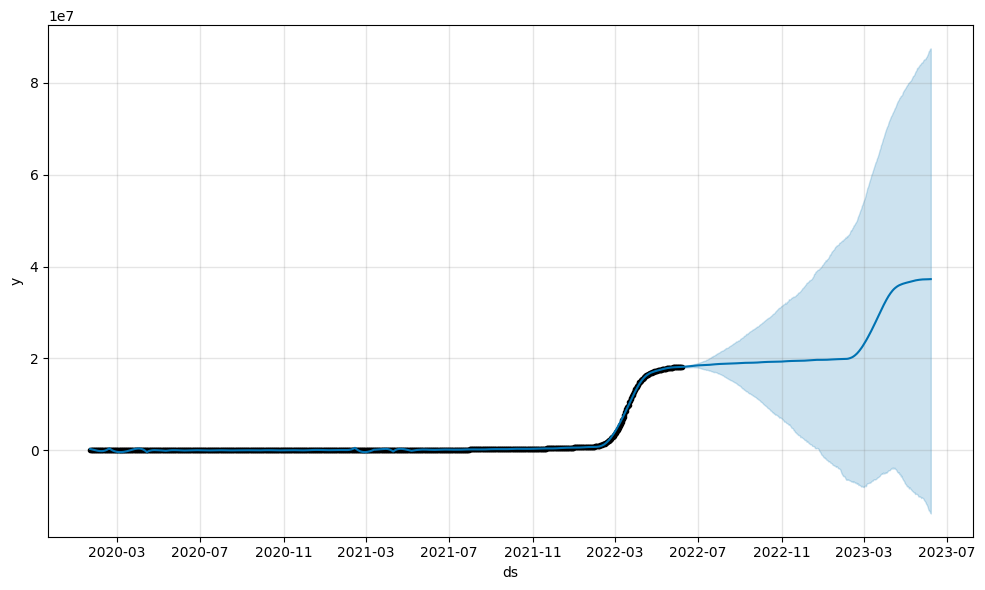

In [ ]:
# 프로핏 모델 객체 만들기
m = Prophet()

# 데이터프레임 학습하기
m.fit(final_kor_df)

# 예측 데이터프레임 준비하기
future = m.make_future_dataframe(periods=365)

# 끝부분 확인하기
future.tail()

# 예측하기
forecast = m.predict(future)

# 예측 결과 끝부분 확인하기
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# 예측 결과 시각화하기
fig1 = m.plot(forecast)

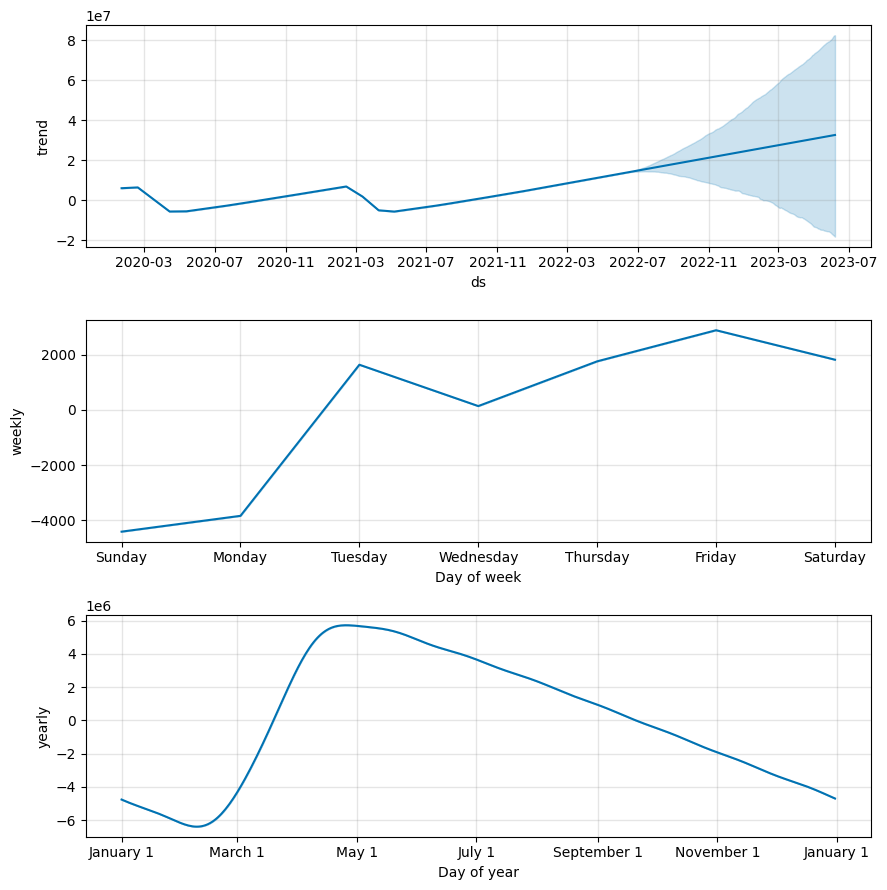

In [ ]:
# 예측 컴포넌트 확인하기
fig2 = m.plot_components(forecast)

# 연관 규칙 분석
- 지지도 : A와 B가 동시에 판매되는 거래의 비율 의미(교집합)
- 신뢰도 : A 구매한 거래 중 B도 함께 구매한 비율( P(A∩B)/P(A) )  
- 향상도 : 전체 건수에서 B를 구매한 비율 대비 A 구매했을때 신뢰도의 증가 비율( P(A∩B)/P(A)*P(B) )
- 어프라이어 : 연관 규칙 추출하기 위한 규칙
-> 각 항목이 각 항목 집합 안에서 어떤 빈도로 출현했고 어떤 항목과 함께 출현했는지 파악!

In [ ]:
# 라이브러리 호출
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/survey_results.csv')
data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [ ]:
# 개발자 타입 열 확인
data['DevType']

# 문자열 리스트로 변경
dev_type = data['DevType'].str.split(';')
dev_type

# 결측치 제거
dev_type.dropna(inplace=True)
dev_type

# 리스트 항목을 각 열로 나누기
exploded_dev_type = dev_type.explode()
exploded_dev_type

# 유일값 확인
exploded_dev_type.unique()

array(['Data scientist or machine learning specialist',
       'Developer, front-end', 'Engineer, data',
       'Engineer, site reliability', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Student', 'Developer, mobile',
       'Educator', 'Engineering manager', 'Database administrator',
       'Academic researcher', 'DevOps specialist',
       'Other (please specify):',
       'Developer, embedded applications or devices',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Designer', 'Scientist', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Blockchain', 'Marketing or sales professional',
       'Security professional'], dtype=object)

In [ ]:
# 특정 값 추출('Data scientist or machine learning specialist' / 'Data or business analyst') - isin 사용
data_analyst_data = data[data.DevType.isin(['Data scientist or machine learning specialist' , 'Data or business analyst'])]
data_analyst_data

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
240,241,I am learning to code,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Friend or family member;Other online resources...,Technical documentation;Blogs;Stack Overflow;O...,Udemy;Codecademy,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
400,401,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","School (i.e., University, College, etc);On the...",NaN,NaN,9,...,30-60 minutes a day,15-30 minutes a day,Just right,Developer portal or other central places to fi...,No,Yes,Yes,Appropriate in length,Neither easy nor difficult,52255.0
463,464,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,150660.0
1089,1090,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Online books;Video-bas...,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
1704,1705,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,24,...,15-30 minutes a day,60-120 minutes a day,Somewhat long,DevOps function;Continuous integration (CI) an...,Yes,No,No,Appropriate in length,Easy,151992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14851,14852,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Other doctoral degree (Ph.D., Ed.D., etc.)","School (i.e., University, College, etc)",NaN,NaN,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,181294.0
14918,14919,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Other doctoral degree (Ph.D., Ed.D., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Written Tutorials,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
15185,15186,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,"Other doctoral degree (Ph.D., Ed.D., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Written Tutorials;Stac...,Coursera;Udemy,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,120000.0
15207,15208,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Stack Overflow;Video-based Online Course...,Coursera;Pluralsight,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,380000.0


In [ ]:
# 프로그래밍 언어 데이터 추출
languages = data_analyst_data['LanguageHaveWorkedWith']
languages

# 데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(';')
languages

# 리스트 항목 행 나누기
exploded_language = languages.explode()
exploded_language

# 프로그램 언어별 응답 수 구하기
size_by_language = exploded_language.groupby(exploded_language).size()
size_by_language

# 데이터 빈도 역순으로 정렬
size_by_language.sort_values(ascending=False, inplace=True)
size_by_language

LanguageHaveWorkedWith
Python        126
SQL            73
R              39
Bash/Shell     37
JavaScript     33
HTML/CSS       32
C++            25
Java           12
C              12
Julia          10
VBA            10
C#              9
SAS             9
Rust            9
TypeScript      8
MATLAB          6
PowerShell      6
Go              5
PHP             5
Scala           4
Ruby            3
Kotlin          2
Assembly        2
Swift           1
APL             1
Perl            1
Lua             1
Elixir          1
Dart            1
Clojure         1
COBOL           1
LISP            1
Name: LanguageHaveWorkedWith, dtype: int64

In [ ]:
# 데이터프레임 위한 딕셔너리 만들기
frame = {'language':size_by_language.index, 'count':size_by_language.values}

# 데이터 프레임 만들기
size_by_language_df = pd.DataFrame(frame)
size_by_language_df.head(10)

,language,count
0,Python,126
1,SQL,73
2,R,39
3,Bash/Shell,37
4,JavaScript,33
5,HTML/CSS,32
6,C++,25
7,Java,12
8,C,12
9,Julia,10


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 딕셔너리로 변경
size_by_language.to_dict()

{'Python': 126,
 'SQL': 73,
 'R': 39,
 'Bash/Shell': 37,
 'JavaScript': 33,
 'HTML/CSS': 32,
 'C++': 25,
 'Java': 12,
 'C': 12,
 'Julia': 10,
 'VBA': 10,
 'C#': 9,
 'SAS': 9,
 'Rust': 9,
 'TypeScript': 8,
 'MATLAB': 6,
 'PowerShell': 6,
 'Go': 5,
 'PHP': 5,
 'Scala': 4,
 'Ruby': 3,
 'Kotlin': 2,
 'Assembly': 2,
 'Swift': 1,
 'APL': 1,
 'Perl': 1,
 'Lua': 1,
 'Elixir': 1,
 'Dart': 1,
 'Clojure': 1,
 'COBOL': 1,
 'LISP': 1}

In [ ]:
import plotly.express as px

# 트리맵 그리기
fig = px.treemap(size_by_language_df, path=['language'], values='count')
fig.show()

In [ ]:
# 결손치 제거
languages.dropna(inplace=True)

# 필터링 위해 리스트로 ㄱㄱ
lang_list = languages.to_list()

lang_list[:10]

[['HTML/CSS', 'Python', 'Ruby', 'SQL', 'VBA'],
 ['Bash/Shell', 'C++', 'Python', 'SQL'],
 ['Bash/Shell', 'Python', 'SQL'],
 ['Python'],
 ['Elixir', 'Python', 'Rust', 'SQL', 'TypeScript'],
 ['Python'],
 ['Bash/Shell',
  'C++',
  'HTML/CSS',
  'JavaScript',
  'Python',
  'Rust',
  'SQL',
  'TypeScript'],
 ['Python', 'SQL'],
 ['Bash/Shell', 'Go', 'HTML/CSS', 'Python'],
 ['Bash/Shell', 'Python', 'Rust']]

In [ ]:
# 추출 대상 프로그래밍 언어 선정
target_langs = ['Python', 'R', 'SQL','MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']

# 필터링 완료된 프로그래밍 언어 담기 위한 리스트 생성
revised_lang_list = []

for lang in lang_list:
    # 추출 대상 프로그래밍 언어만 필터
    filtered = [x for x in lang if x in target_langs]
    revised_lang_list.append(filtered)

revised_lang_list

[['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Python', 'SQL'],
 ['Go', 'Python'],
 ['Python'],
 ['Python'],
 ['Go', 'Java'],
 ['JavaScript', 'Python'],
 ['Python', 'R', 'SQL'],
 ['Julia', 'Python', 'R'],
 ['Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['Python', 'SQL'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SAS', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python', 'R', 'SAS', 'SQL'],
 ['Python', 'Scala', 'SQL'],
 ['Python', 'R'],
 ['Python', 'R'],
 ['JavaScript', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['JavaScript', 'Python'],
 ['SQL'],
 ['Python', 'R', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Java', 'Python'],
 ['Python'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Java', 'JavaScript', 'Python'],
 ['JavaSc

In [ ]:
# 전처리 라이브러리 탑재
from mlxtend.preprocessing import TransactionEncoder

# 전처리기 생성
te = TransactionEncoder()

# 전처리 수행
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# 전처리 결과를 데이터프레임으로 전환
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Go,Java,JavaScript,Julia,MATLAB,Python,R,SAS,SQL,Scala
0,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
135,False,False,False,True,False,True,False,False,False,False
136,False,False,False,True,False,True,False,False,False,False
137,False,False,False,False,False,True,True,False,True,False
138,False,False,True,False,False,True,False,False,True,False


In [ ]:
# 학습 알고리즘 탑재
from mlxtend.frequent_patterns import apriori, association_rules

# 지지도 구하기
freq_items = apriori(new_languages, min_support=0.01, use_colnames=True, verbose=1)


Processing 60 combinations | Sampling itemset size 5


In [ ]:
# 학습 결과 확인하기
freq_items.sort_values(['support'], ascending=False).head(20)

,support,itemsets
5,0.900000,(Python)
8,0.521429,(SQL)
31,0.471429,"(Python, SQL)"
6,0.278571,(R)
29,0.250000,"(Python, R)"
2,0.235714,(JavaScript)
19,0.221429,"(Python, JavaScript)"
34,0.185714,"(SQL, R)"
61,0.171429,"(Python, SQL, R)"
22,0.150000,"(JavaScript, SQL)"


In [ ]:
# 항목 집합의 항목 개수 구하기
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.035714,(Go),1
1,0.085714,(Java),1
2,0.235714,(JavaScript),1
3,0.071429,(Julia),1
4,0.042857,(MATLAB),1
...,...,...,...
74,0.014286,"(JavaScript, Python, SQL, SAS)",4
75,0.021429,"(Python, SQL, Julia, R)",4
76,0.028571,"(Python, SQL, R, SAS)",4
77,0.014286,"(Python, SQL, R, Scala)",4


In [ ]:
# 신뢰도와 향상도
rules = association_rules(freq_items, min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JavaScript),(Go),0.235714,0.035714,0.014286,0.060606,1.696970,0.005867,1.026498,0.537383
1,(Go),(JavaScript),0.035714,0.235714,0.014286,0.400000,1.696970,0.005867,1.273810,0.425926
2,(Python),(Go),0.900000,0.035714,0.028571,0.031746,0.888889,-0.003571,0.995902,-0.555556
3,(Go),(Python),0.035714,0.900000,0.028571,0.800000,0.888889,-0.003571,0.500000,-0.114754
4,(SQL),(Go),0.521429,0.035714,0.014286,0.027397,0.767123,-0.004337,0.991449,-0.388128
...,...,...,...,...,...,...,...,...,...,...
409,(Python),"(JavaScript, SQL, R, Java)",0.900000,0.014286,0.014286,0.015873,1.111111,0.001429,1.001613,1.000000
410,(SQL),"(Python, JavaScript, R, Java)",0.521429,0.014286,0.014286,0.027397,1.917808,0.006837,1.013481,1.000000
411,(R),"(JavaScript, Python, SQL, Java)",0.278571,0.042857,0.014286,0.051282,1.196581,0.002347,1.008880,0.227723
412,(Java),"(JavaScript, Python, SQL, R)",0.085714,0.035714,0.014286,0.166667,4.666667,0.011224,1.157143,0.859375
